In [1]:
from pycaret.classification import * 
from pycaret.datasets import get_data

In [3]:
diabetes = get_data('diabetes')
exp_clf = setup(diabetes, target='Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,6096
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.7618,0.8244,0.6000,0.6859,0.6321,0.4588,0.4667,0.1537
1,Logistic Regression,0.7561,0.8102,0.5357,0.7068,0.6005,0.4315,0.4459,0.0532
2,CatBoost Classifier,0.7543,0.8406,0.5775,0.6789,0.6173,0.4394,0.4473,2.1513
3,Ridge Classifier,0.7506,0.0000,0.5246,0.6900,0.5882,0.4163,0.4287,0.0058
4,Extreme Gradient Boosting,0.7506,0.8107,0.6310,0.6481,0.6359,0.4469,0.4498,0.2349
5,Ada Boost Classifier,0.7488,0.8074,0.6050,0.6609,0.6204,0.4358,0.4448,0.1161
6,Linear Discriminant Analysis,0.7487,0.8072,0.5298,0.6877,0.5897,0.4150,0.4278,0.0102
7,Extra Trees Classifier,0.7487,0.8150,0.5298,0.6966,0.5955,0.4184,0.4311,0.2730
8,Random Forest Classifier,0.7434,0.7949,0.5099,0.7029,0.5776,0.4018,0.4212,0.1144
9,Decision Tree Classifier,0.7432,0.7150,0.6213,0.6526,0.6306,0.4349,0.4398,0.0065


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6096, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [5]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7407,0.8496,0.5263,0.6667,0.5882,0.4028,0.4088
1,0.7407,0.7699,0.6316,0.6316,0.6316,0.4316,0.4316
2,0.6852,0.7549,0.5789,0.5500,0.5641,0.3180,0.3182
3,0.7963,0.8767,0.7895,0.6818,0.7317,0.5689,0.5729
4,0.7593,0.8361,0.5789,0.6875,0.6286,0.4524,0.4561
5,0.7407,0.7940,0.7368,0.6087,0.6667,0.4577,0.4633
6,0.7407,0.7053,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7358,0.8302,0.5000,0.6429,0.5625,0.3775,0.3836
8,0.8302,0.9063,0.7222,0.7647,0.7429,0.6163,0.6168
9,0.7358,0.7841,0.6667,0.6000,0.6316,0.4266,0.4280


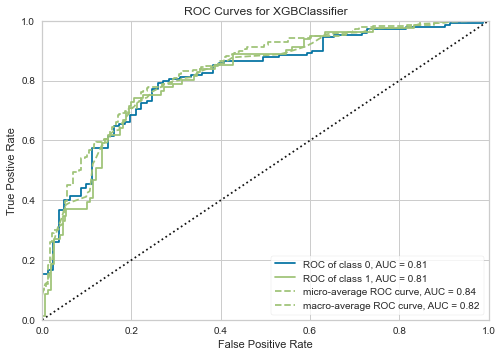

In [6]:
plot_model(xgb)

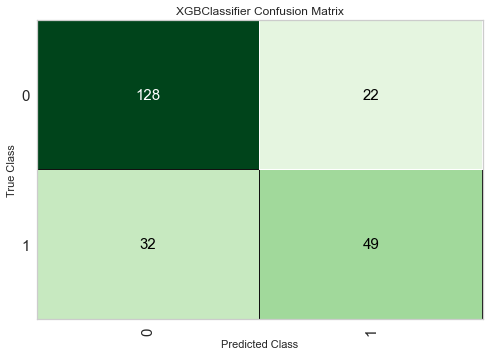

In [8]:
plot_model(xgb, 'confusion_matrix')

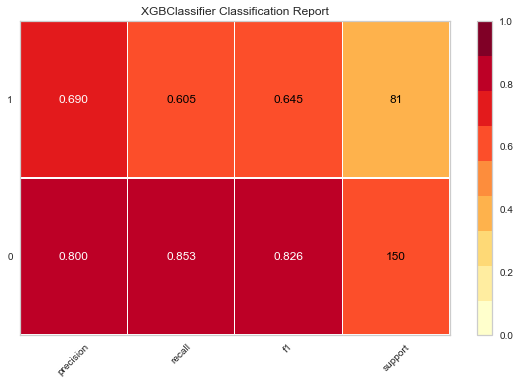

In [9]:
plot_model(xgb, 'class_report')

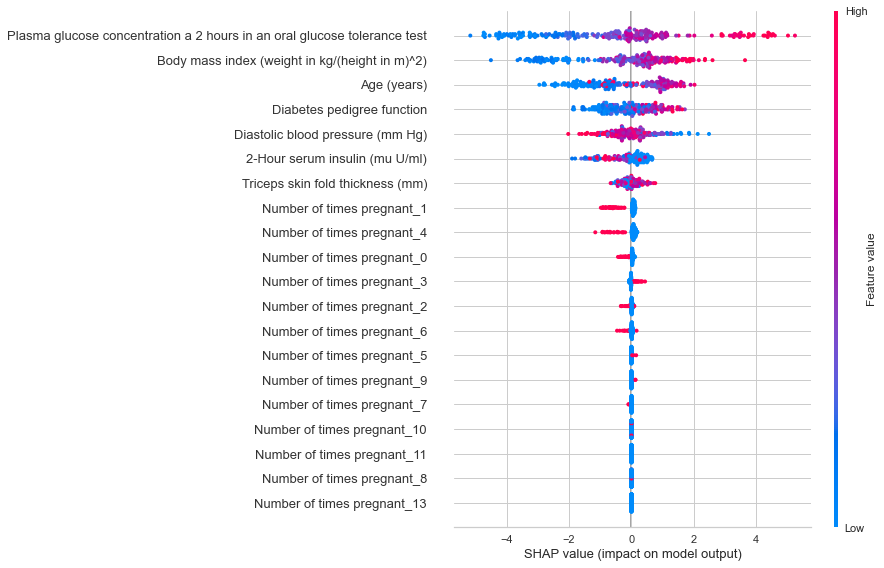

In [10]:
interpret_model(xgb)

In [11]:
predictions = predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7662,0.8136,0.6049,0.6901,0.6447,0.4717,0.4739


In [12]:
finalize_model(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=6096, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [14]:
save_model(xgb, 'diabetes_xgboost')

Transformation Pipeline and Model Succesfully Saved


In [15]:
model = load_model('diabetes_xgboost')

Transformation Pipeline and Model Successfully Loaded


## SHAP Demonstration

In [18]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [27]:
explainer.expected_value

14.230186

In [28]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

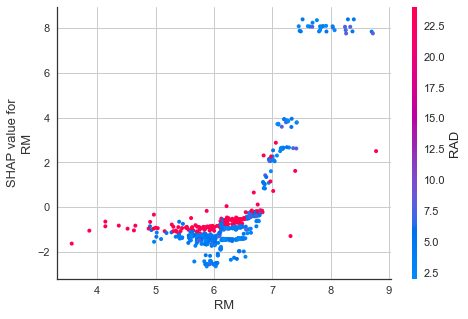

In [29]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

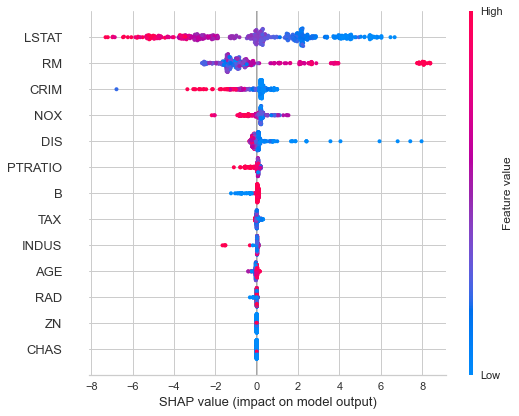

In [30]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

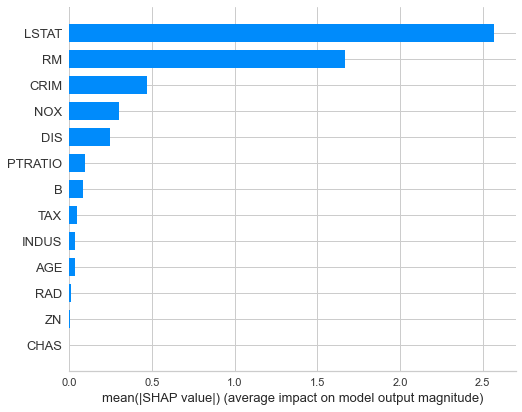

In [31]:
shap.summary_plot(shap_values, X, plot_type="bar")